In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')

### General Information

In [4]:
print(df.head())
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

### Checking for missing Values

In [6]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Data visualization
#### Plot gender distribution

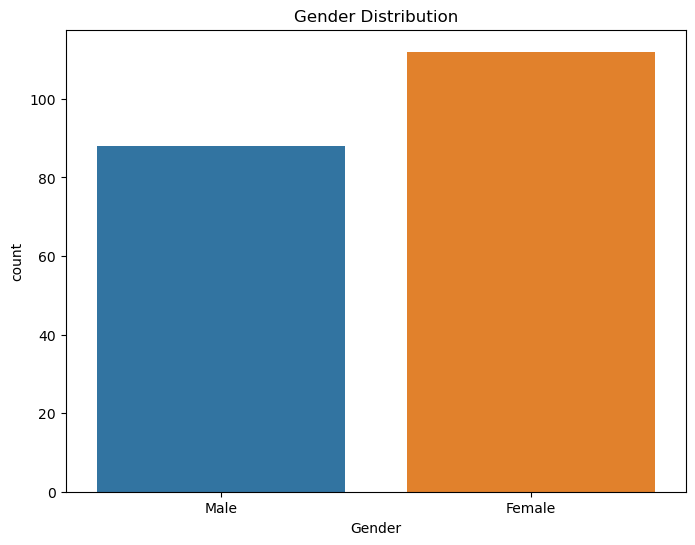

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

#### The customers are more female than male

#### Plot age distribution

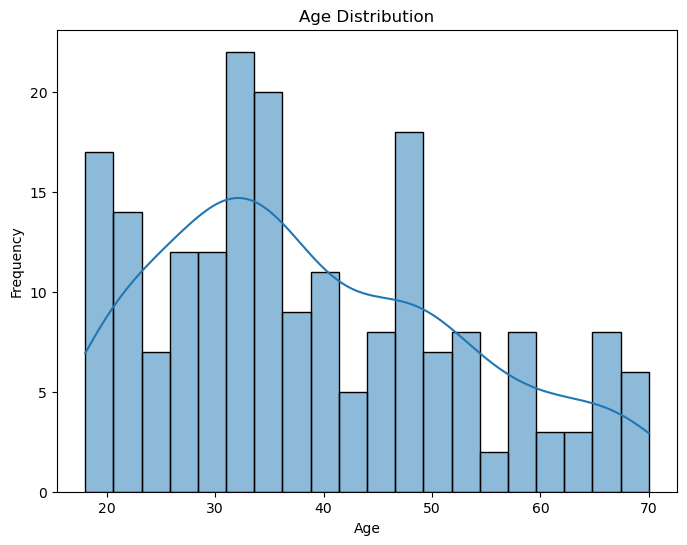

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### The customers are more likely between 30 and 40 among the most frequent visitors to the shopping mall

#### Plot annual income distribution

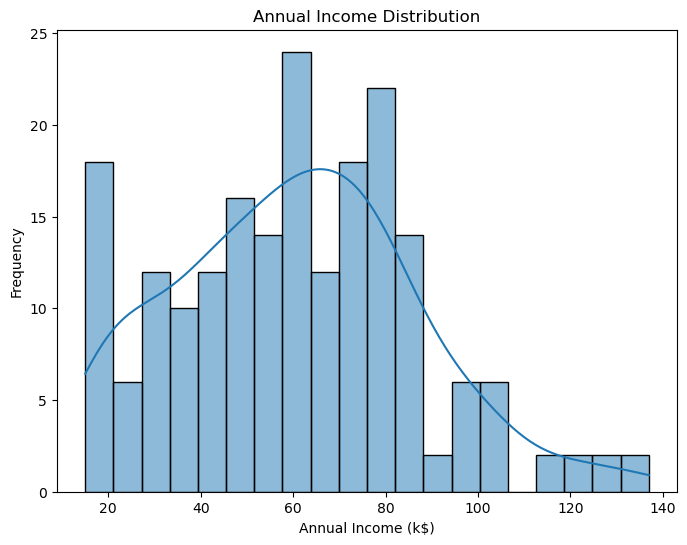

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

#### The customers have diverse annual income. It's important to hightlight the peak ranges of less than 20K, the around 60K and around 80K among the most frequent visitors to the shopping mall


#### Plot spending score distribution

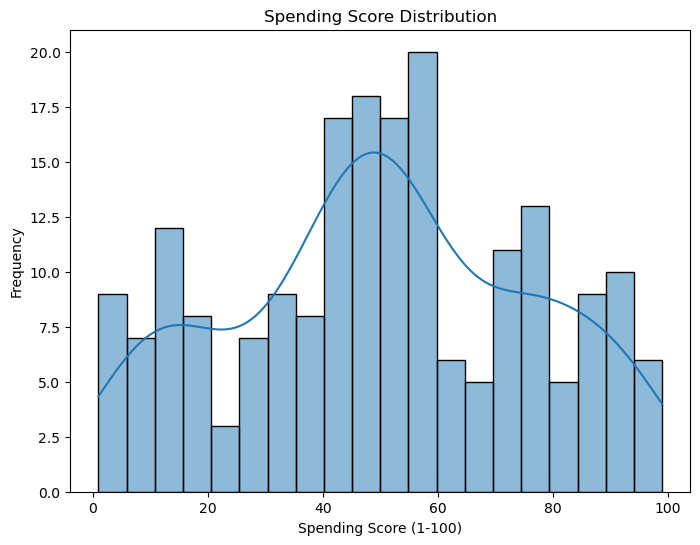

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

#### The customers usually spend from 40 to 60 on the Spending Score among the most frequent visitors to the shopping mall


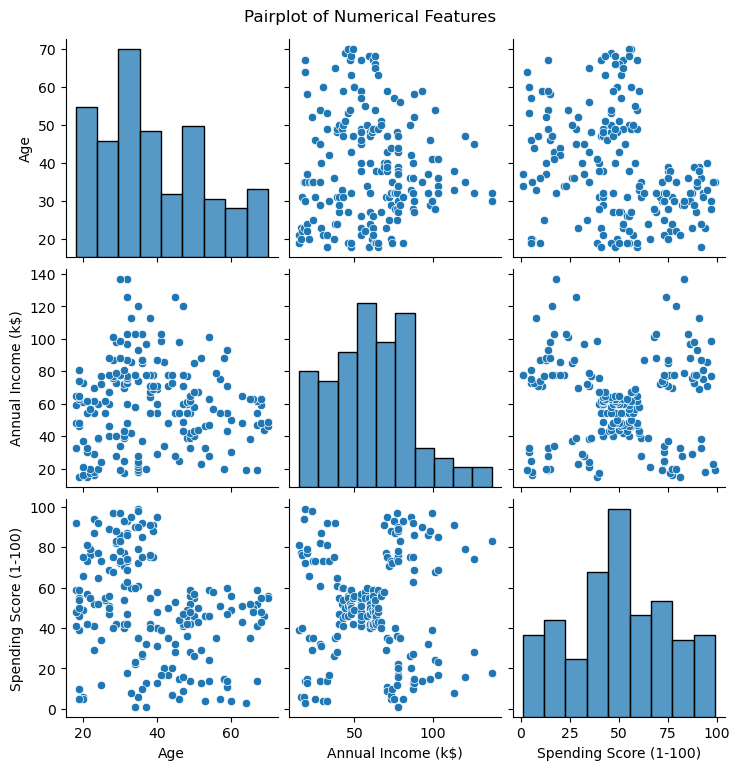

In [12]:
# Pairplot of numerical features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

#### On this Pairplot it's possible to check the correlation between Age x Spending Score and how they look a little bit inversely proportional

C:\Users\doama\AppData\Local\Temp\ipykernel_2928\2507392409.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


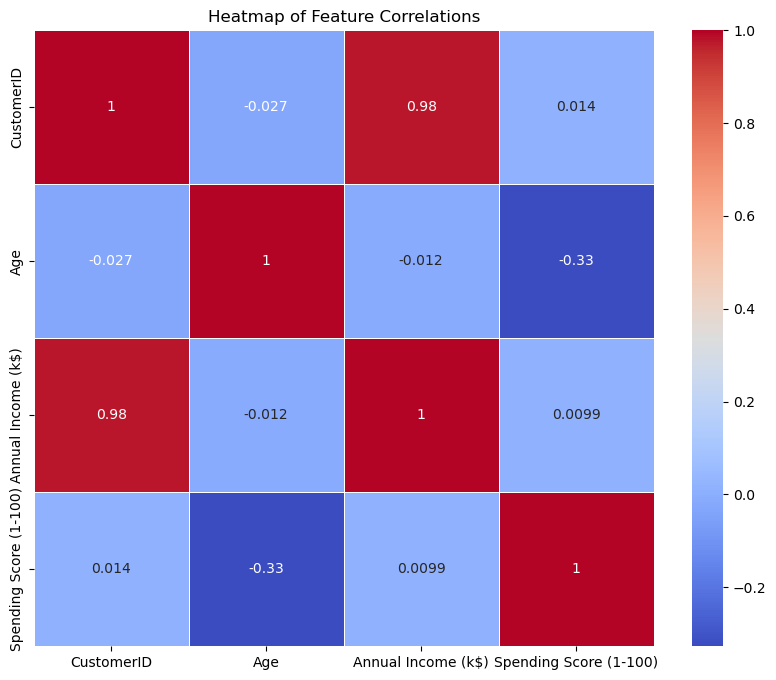

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

#### There's a strange and strong connection between CustomerUD and Annual Income
#### Let's observe closer

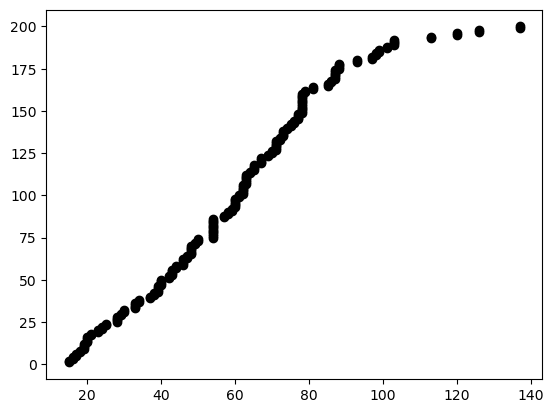

In [27]:
x = df['Annual Income (k$)']
y = df['CustomerID']

plt.plot(x, y, 'o', color='black');

#### The CustomerID is distributed according to the Annual Income of people who frequent the Mall

### THE MODEL
#### Choosing the Annual Income and Spending Score to clusterization

In [42]:
X_AS = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [22]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_AS)
df['cluster_AS'] = kmeans.labels_

C:\Users\doama\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\doama\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


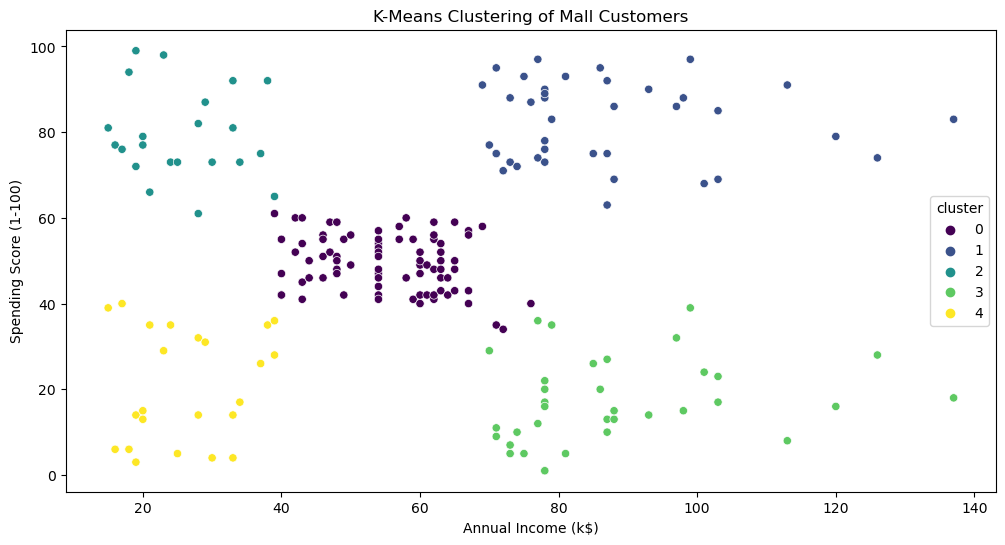

In [23]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_AS', palette='viridis')
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [43]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_AS, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.027746118389154306


#### The silhuoette score is the distance between a sample and the nearest cluster that the sample is not a part of. So the highest the distance better is the model

#### Choosing the Annual Income and Age to clusterization

In [38]:
X_AgeA = df[['Annual Income (k$)', 'Age']]

In [39]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_AgeA)
df['cluster_AgeA'] = kmeans.labels_

C:\Users\doama\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\doama\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


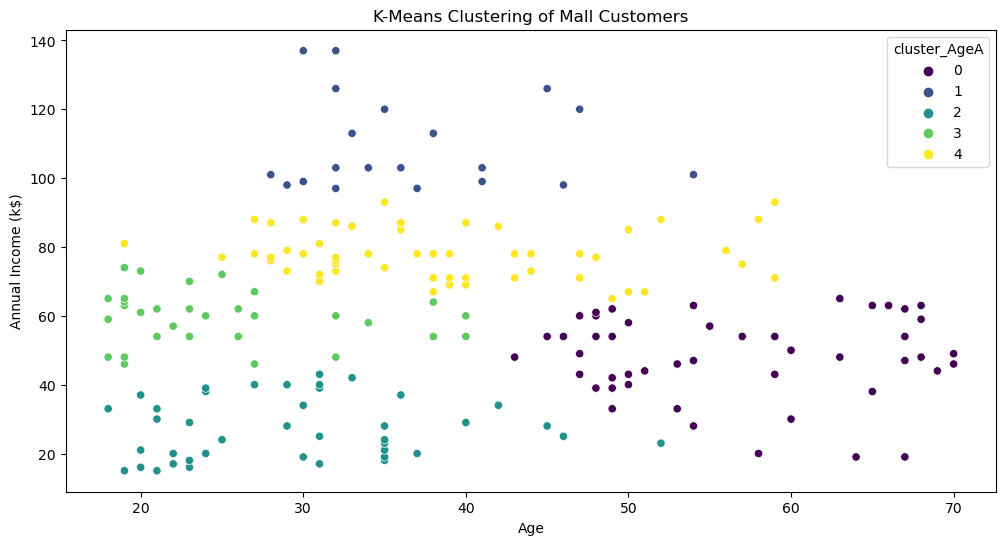

In [40]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='cluster_AgeA', palette='viridis')
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [41]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_AgeA, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.40157587536205724


#### This silhouette Score Annual Income x Age is presenting  better than Annual Income x Spending Score

In [44]:
X_AgeS = df[['Spending Score (1-100)', 'Age']]

In [45]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_AgeS)
df['cluster_AgeS'] = kmeans.labels_

C:\Users\doama\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\doama\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


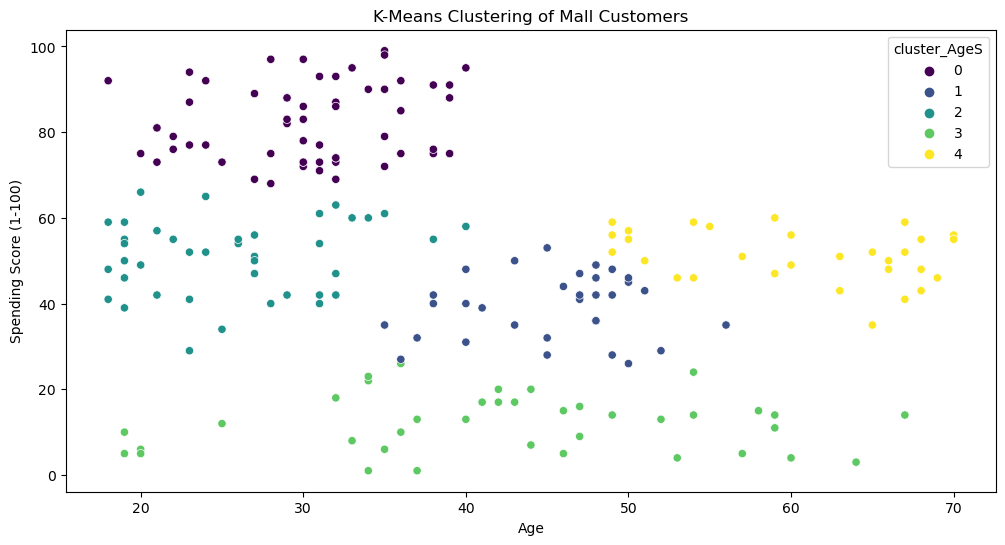

In [46]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='cluster_AgeS', palette='viridis')
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [47]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_AgeS, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.44526667994351227


#### This silhouette Score Spending Score x Age is presenting  better than the others